# Solution to Exercises 

## Beginning Python Programming

**pandas**

In [4]:
# 1) Create your own data file with some interesting info. 
#    Read in the data into a dataframe  called df using pd.read_excel().
import pandas as pd
df=pd.read_excel("sugar.xlsx")

In [5]:
# 2) Display the first row of df
df.head(1)

,Food,Grams of Sugar,Recommended Daily Limit (25 grams)
0,BK Chocolate Shake,112,4x daily limit


In [7]:
# 3) Abbreviate the column names.
df.columns=["food", "sugar(gm)","daily limit"]
# 4) Display the first line
df.head(1)

,food,sugar(gm),daily limit
0,BK Chocolate Shake,112,4x daily limit


In [8]:
# 5) Show how to use .loc() to get a particular entry in your dataframe.
df.loc[0,"sugar(gm)"]

112

**for loops**

In [9]:
import numpy as np
list1=np.arange(0,12,2)
print("list 1=", list1)
def addone(list1):
    for i in list1:
        print(i+1)
    return print("Mission Accomplished!")

addone(list1)

list 1= [ 0  2  4  6  8 10]
1
3
5
7
9
11
Mission Accomplished!


**If conditional statements**

In [11]:
list2=np.arange(0,22,2)
print("list2=",list2)

def halve_upper_half(list2):
    for i in list2:
        if i>10:
            print(i/2)
    return

halve_upper_half(list2)

list2= [ 0  2  4  6  8 10 12 14 16 18 20]
6.0
7.0
8.0
9.0
10.0


**Dataframes**

In [16]:
import pandas as pd
import numpy as np
rawCOVID = pd.read_json('https://data.cityofchicago.org/resource/yhhz-zm2v.json?$limit=100000') #Import data directly from data portal
COVID=rawCOVID[['deaths_cumulative', "population",  'tests_cumulative','zip_code']]
COVID.dropna  #drop rows with missing data
COVID.columns=["deaths","population","tests","zip"] #simplify the column names

In [17]:
def MyCOVID2(COVID,zipcode):
    alreadychecked=0  #eliminate duplication of information
    for z in COVID.index:  #go through all the index values
        if COVID.loc[z,"zip"]==zipcode and alreadychecked==0:    #found the zip we requested (first-time)
            alreadychecked=1  #we will only do this once
            df=COVID[COVID["zip"]==zipcode]
            numtested=df["tests"].max()
            numdeaths=df["deaths"].max()
            numpopulation=df["population"].max()
            print("Zip code: ", COVID.loc[z,"zip"])
            print("population is ", numpopulation)
            print("number tested is ", numtested)
            print("number deaths ", numdeaths)
            print("population is ", numpopulation)
    return ("Enter a different zip code if you wish.")

In [18]:
MyCOVID2(COVID,'60637')

Zip code:  60637
population is  47454
number tested is  416617
number deaths  107
population is  47454


'Enter a different zip code if you wish.'

## Glimpse of Chicago

**Predicting Exemplary Schools**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel("MiddleSchool.xlsx")

#---PREDICTION MODEL----#
def mypredict(df):
    for i in df.index:
        if (df.loc[i,"Teacher Retention Rate"]>=85 and df.loc[i,"Student Attendance Rate"]>=95 and df.loc[i,"# Student Enrollment"]<=267 and df.loc[i,"Student Chronic Truancy Rate"]<=2.9  and df.loc[i,"Teacher Retention Rate"]>=90.6) :  
            df.loc[i,"Prediction"]=1       
        else:
            df.loc[i,"Prediction"]=0
    return df

#---APPLY MODEL TO OUR DATA---#
mydf=mypredict(df)
mydf=mydf.reset_index(drop=True)

#---COMPUTE YOUR SCORE---#
TP=0
TN=0
FP=0
FN=0
numschools=0
for i in mydf.index:
    if mydf.loc[i,"Prediction"]==1 and mydf.loc[i,"Summative Designation"]=="Exemplary":
        TP=TP+1
    if mydf.loc[i,"Prediction"]==0 and mydf.loc[i,"Summative Designation"]!="Exemplary":
        TN=TN+1
    if mydf.loc[i,"Prediction"]==1 and mydf.loc[i,"Summative Designation"]!="Exemplary":
        FP=FP+1
    if mydf.loc[i,"Prediction"]==0 and mydf.loc[i,"Summative Designation"]=="Exemplary":
        FN=FN+1
    numschools=numschools+1
print("|TP|=",TP)
print("|TN|=",TN)
print("|FP|=",FP)
print("|FN|=",FN)
accuracy=round((TP+TN)/numschools,2)
precision=round(TP/(TP+FP),2)
recall=round(TP/(TP+FN),2)
F1score=2*(precision*recall)/(precision+recall)
print("Accuracy (% correct all 122 schools)=",100*accuracy,"%")
print("Precision (% correct of those you predicted to be exemplary) =",100*precision,"%")
print("Recall (% correct of schools that are exemplary) =",100*recall,"%")
print('COMPETITION F1 SCORE=',round(F1score*100,2),"%" )

|TP|= 4
|TN|= 113
|FP|= 3
|FN|= 2
Accuracy (% correct all 122 schools)= 96.0 %
Precision (% correct of those you predicted to be exemplary) = 56.99999999999999 %
Recall (% correct of schools that are exemplary) = 67.0 %
COMPETITION F1 SCORE= 61.6 %


**Great Migration**

In [7]:
migration=pd.read_excel('migration.xlsx')
migdf=migration
migdf.columns=["City","Mig2","Mig1"]
migdf["city"]="city"  #create a column for the city
migdf["state"]="state"  #create a column for the state
for m in migdf.index:
    x=migdf.loc[m,"City"].split(", ")  #split the city from the state
    migdf.loc[m,"city"]=x[0]  #add the city to the city column
    migdf.loc[m,"state"]=x[1]  #add the state to the state column
migdf.drop(['City'], axis=1, inplace=True) #Drop the original City column
migdf=migdf.set_index(["city","state"],drop=True) #create multi-index
rawlatlon=pd.read_excel("uscities.xlsx") #read data
latlon=rawlatlon[["city_ascii","lat","lng","state_id"]] #select columns
latlon.columns=["city","lat","lon","state"] #rename columns
latlon=latlon.set_index(["city","state"],drop=True) #create multi-index
df=pd.merge(latlon,migdf, how='inner', left_index=True,right_index=True)
df.columns=["lat","lon","Mig2","Mig1"]
df=df[df["Mig1"]!="No data"]
df=df[df["Mig2"]!="No data"]

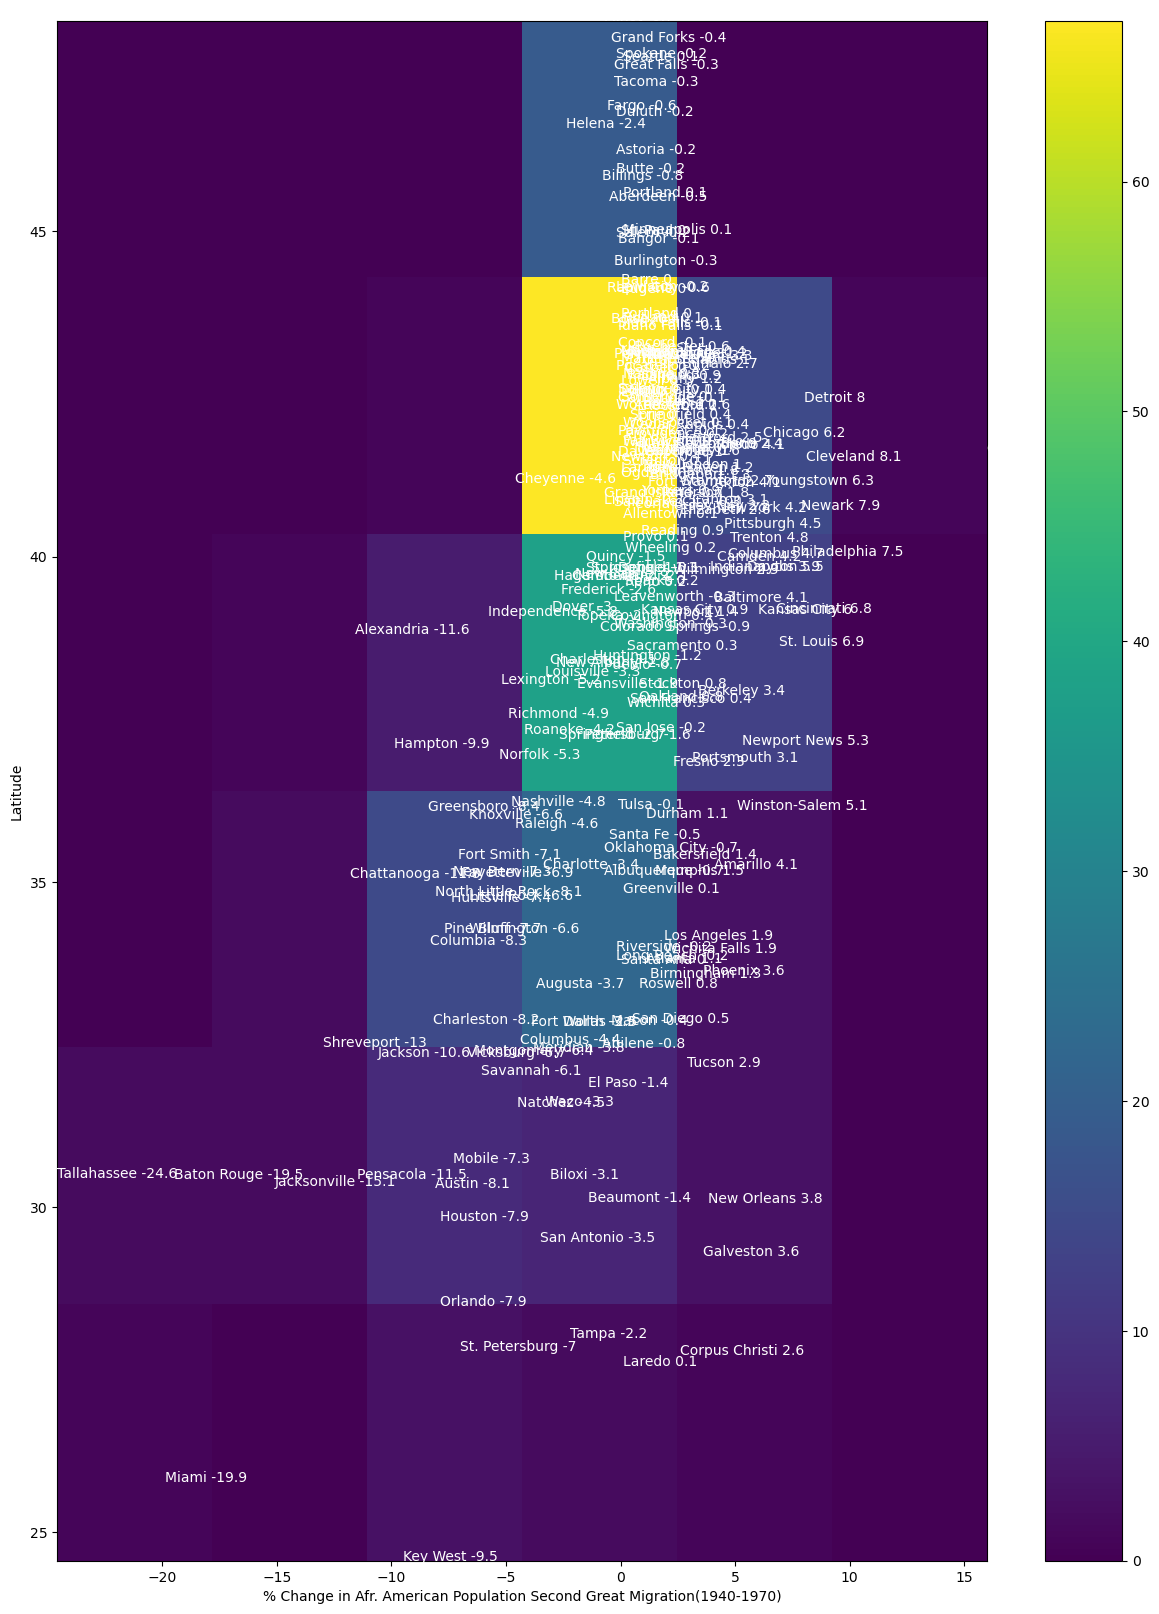

In [8]:
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(15, 20))
X=df["Mig2"].astype(float)
Y=df["lat"]
heat_map= plt.hist2d(X, Y, bins=6) #heat map is a 2dimensional histogram
plt.xlabel("% Change in Afr. American Population Second Great Migration(1940-1970)")
plt.ylabel("Latitude")
names=df.reset_index()
for i in names.index:   ##add the names of the cities and %change in Afr. American population
    plt.text(names.Mig2[i],names.lat[i],names.city[i]+' '+str(names.Mig2[i]),fontsize=10,color='white')
plt.colorbar()
fig.savefig("Migration2.png")

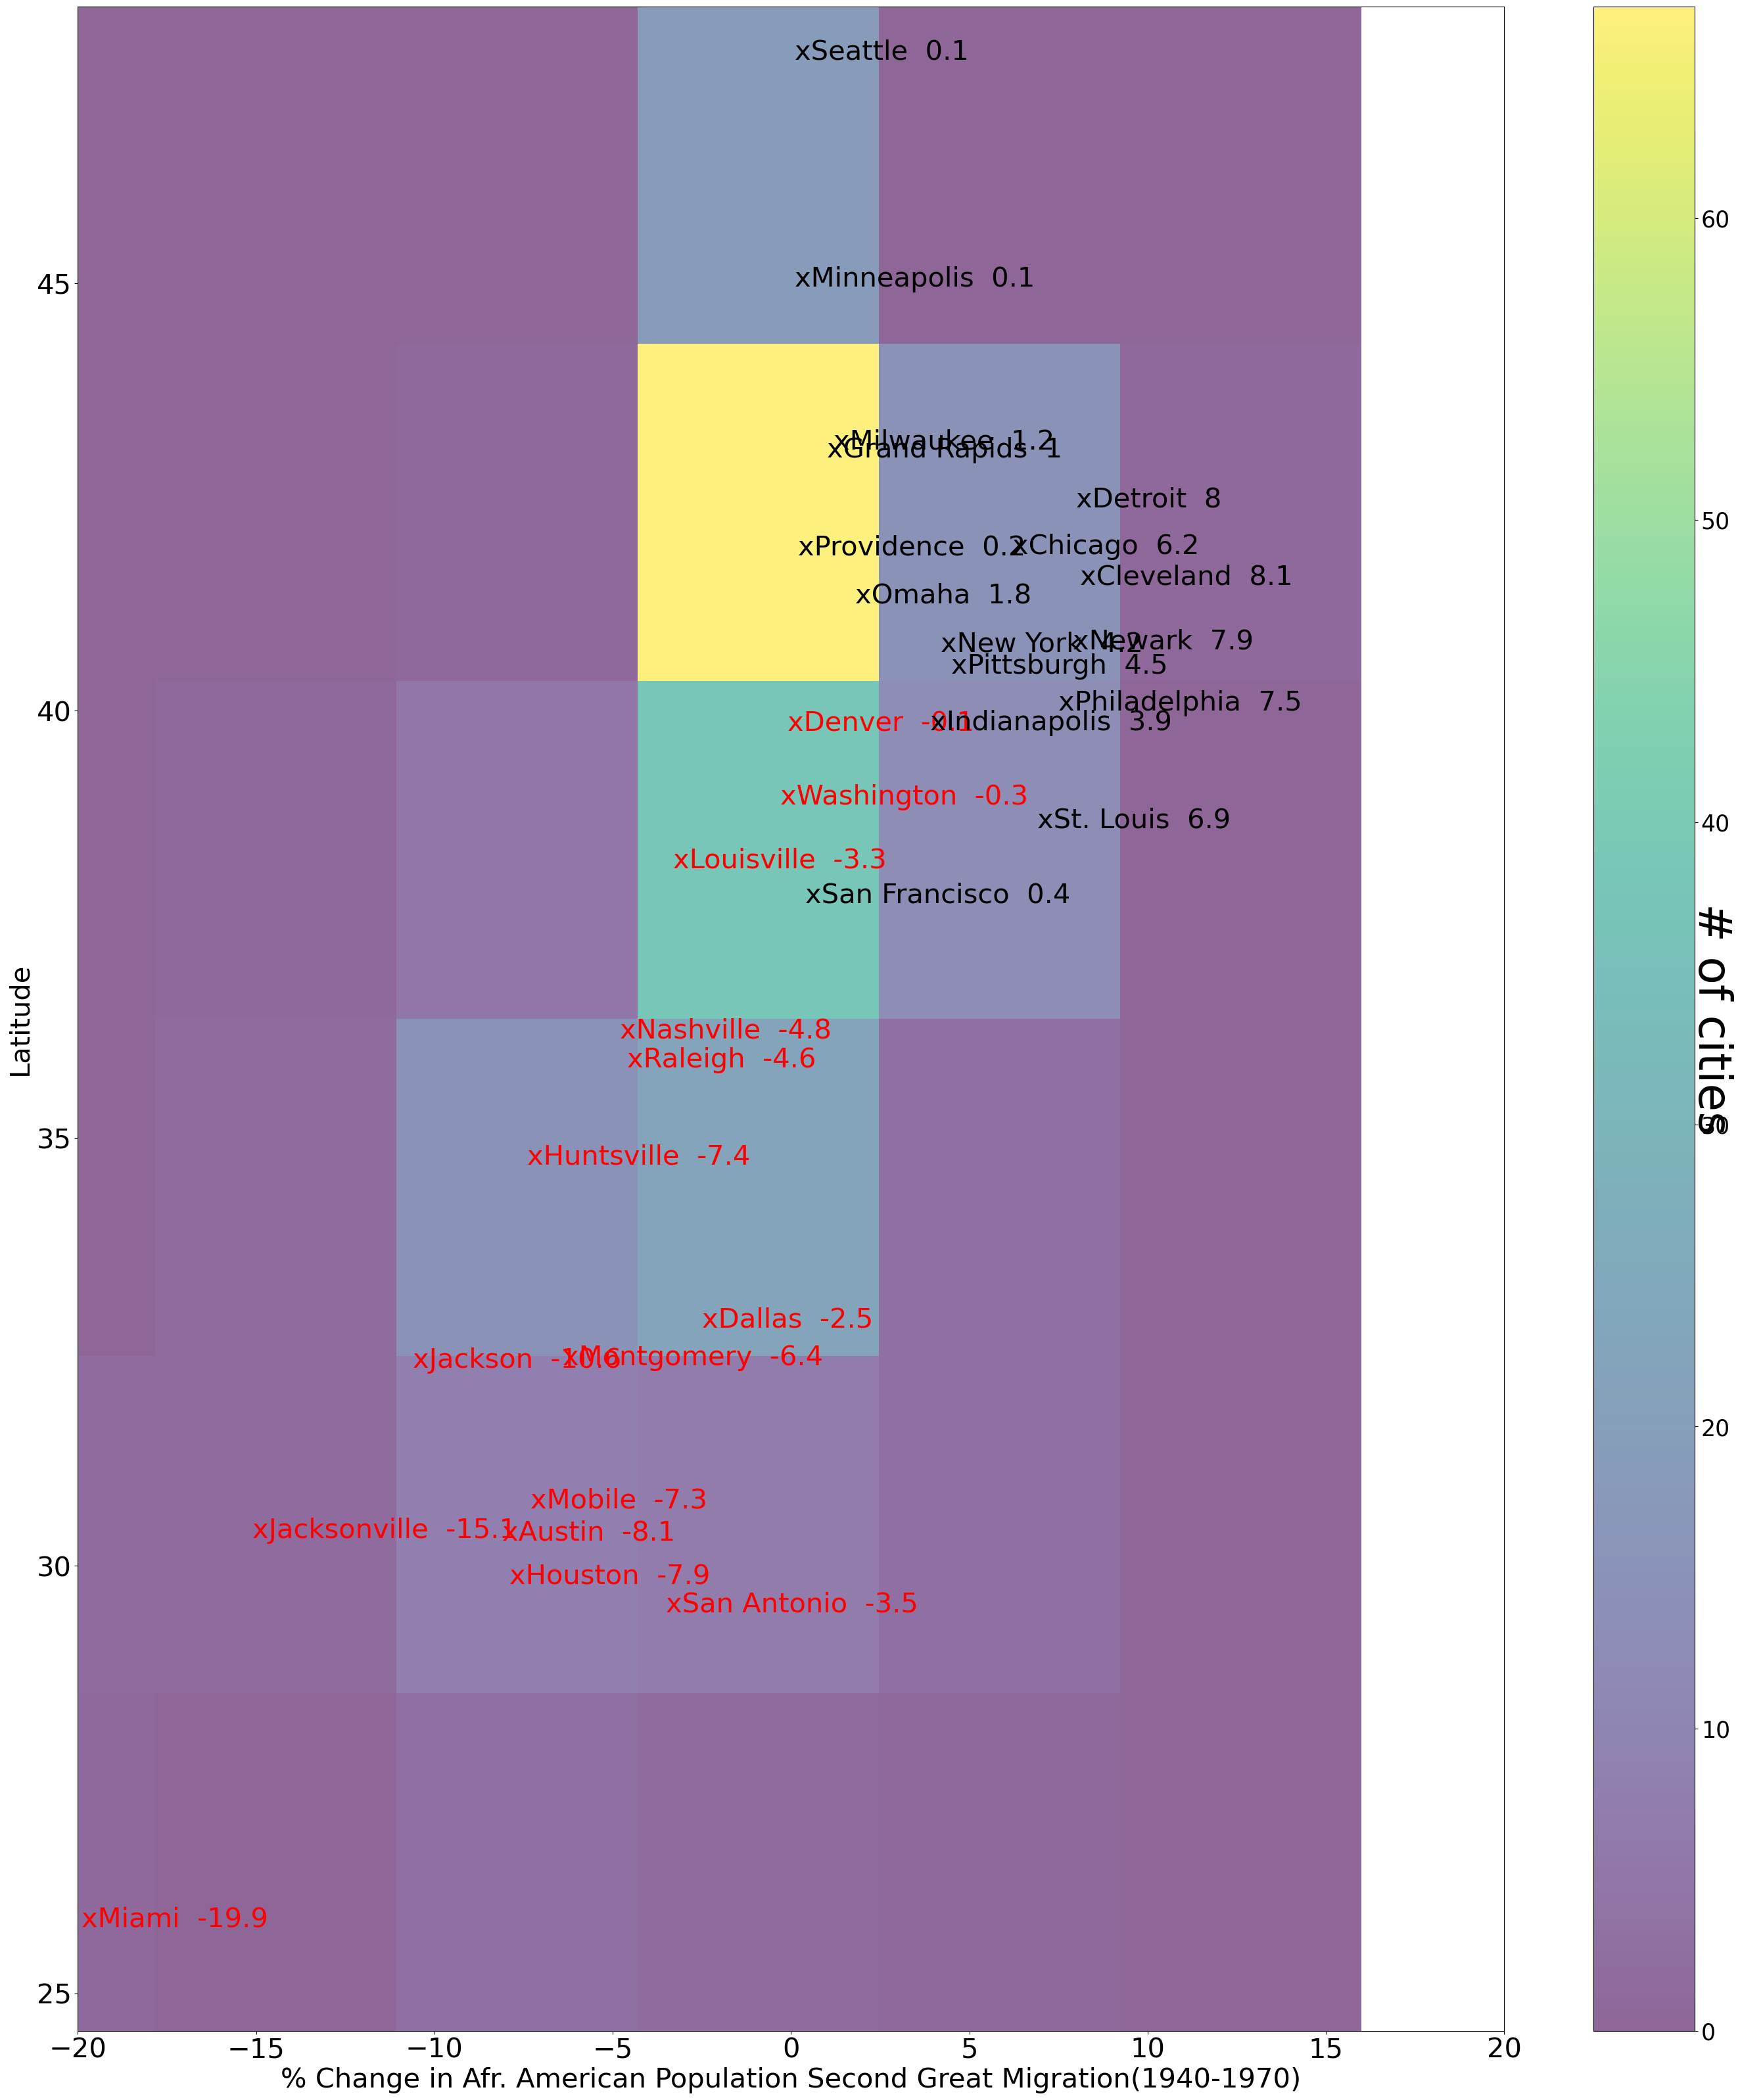

In [10]:
fig,ax=plt.subplots(figsize=(35, 40))
X=df["Mig2"].astype(float)
Y=df["lat"]
heat_map= plt.hist2d(X, Y, bins=6,alpha=.6) #heat map is a 2dimensional histogram
plt.xlabel("% Change in Afr. American Population Second Great Migration(1940-1970)",size=30)
plt.ylabel("Latitude",size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.xlim(-20,20)
names=df.reset_index()
for i in names.index:   ##add the names of the cities and %change in Afr. American population
    if names.Mig2[i]<0 and any(names.loc[i,'city'] in x for x in ["Austin","Chicago","Detroit","Cleveland","Dallas","Denver","Grand Rapids","Houston","Huntsville","Indianapolis","Jacksonville","Louisville","Miami","Milwaukee","Minneapolis","Montgomery","Mobile","Nashville","New York","New Orleans","Newark","Omaha","Philadelphia","Pittsburgh","Providence","Raleigh","San Antonio","San Francisco","Seattle","St. Louis","Washington, DC",]):
        plt.text(names.Mig2[i],names.lat[i],"x"+names.city[i]+'  '+str(names.Mig2[i]),fontsize=30,color='red')
    else:
        if any(names.loc[i,'city'] in x for x in ["Chicago","Detroit","Cleveland","Dallas","Grand Rapids","Indianapolis","Louisville","Milwaukee","Minneapolis","Montgomery","Nashville","New York","Newark","Omaha","Philadelphia","Pittsburgh","Providence","Raleigh","San Francisco","Seattle","St. Louis","Washington, DC",]):
            plt.text(names.Mig2[i],names.lat[i],"x"+names.city[i]+'  '+str(names.Mig2[i]),fontsize=30,color='black')

cbar = plt.colorbar()
cbar.set_label('# of cities', rotation=270,size=50)
cbar.ax.tick_params(labelsize=25)
fig.savefig("Migration2Simplified.png")

The percentage changes are smaller for the 2nd great migration when compared to the first.  For example, Chicago dropped from 24.6 to 6.2.

**Chicago Hardship Index**

In [3]:
import pandas as pd
raw_hardship=pd.read_excel('HIHOM20142017.xlsx')
dfHI14=raw_hardship[["Community","population(K)","HI14","UNEMP14","NOHS14","DEP14","HOUS14","POV14","INC14","HOM14","LAT","LON"]]
dfHI17=raw_hardship[["Community","population(K)","HI17","UNEMP17","NOHS17","DEP17","HOUS17","POV17","INC17","HOM17","LAT","LON"]]
hom_df = dfHI17

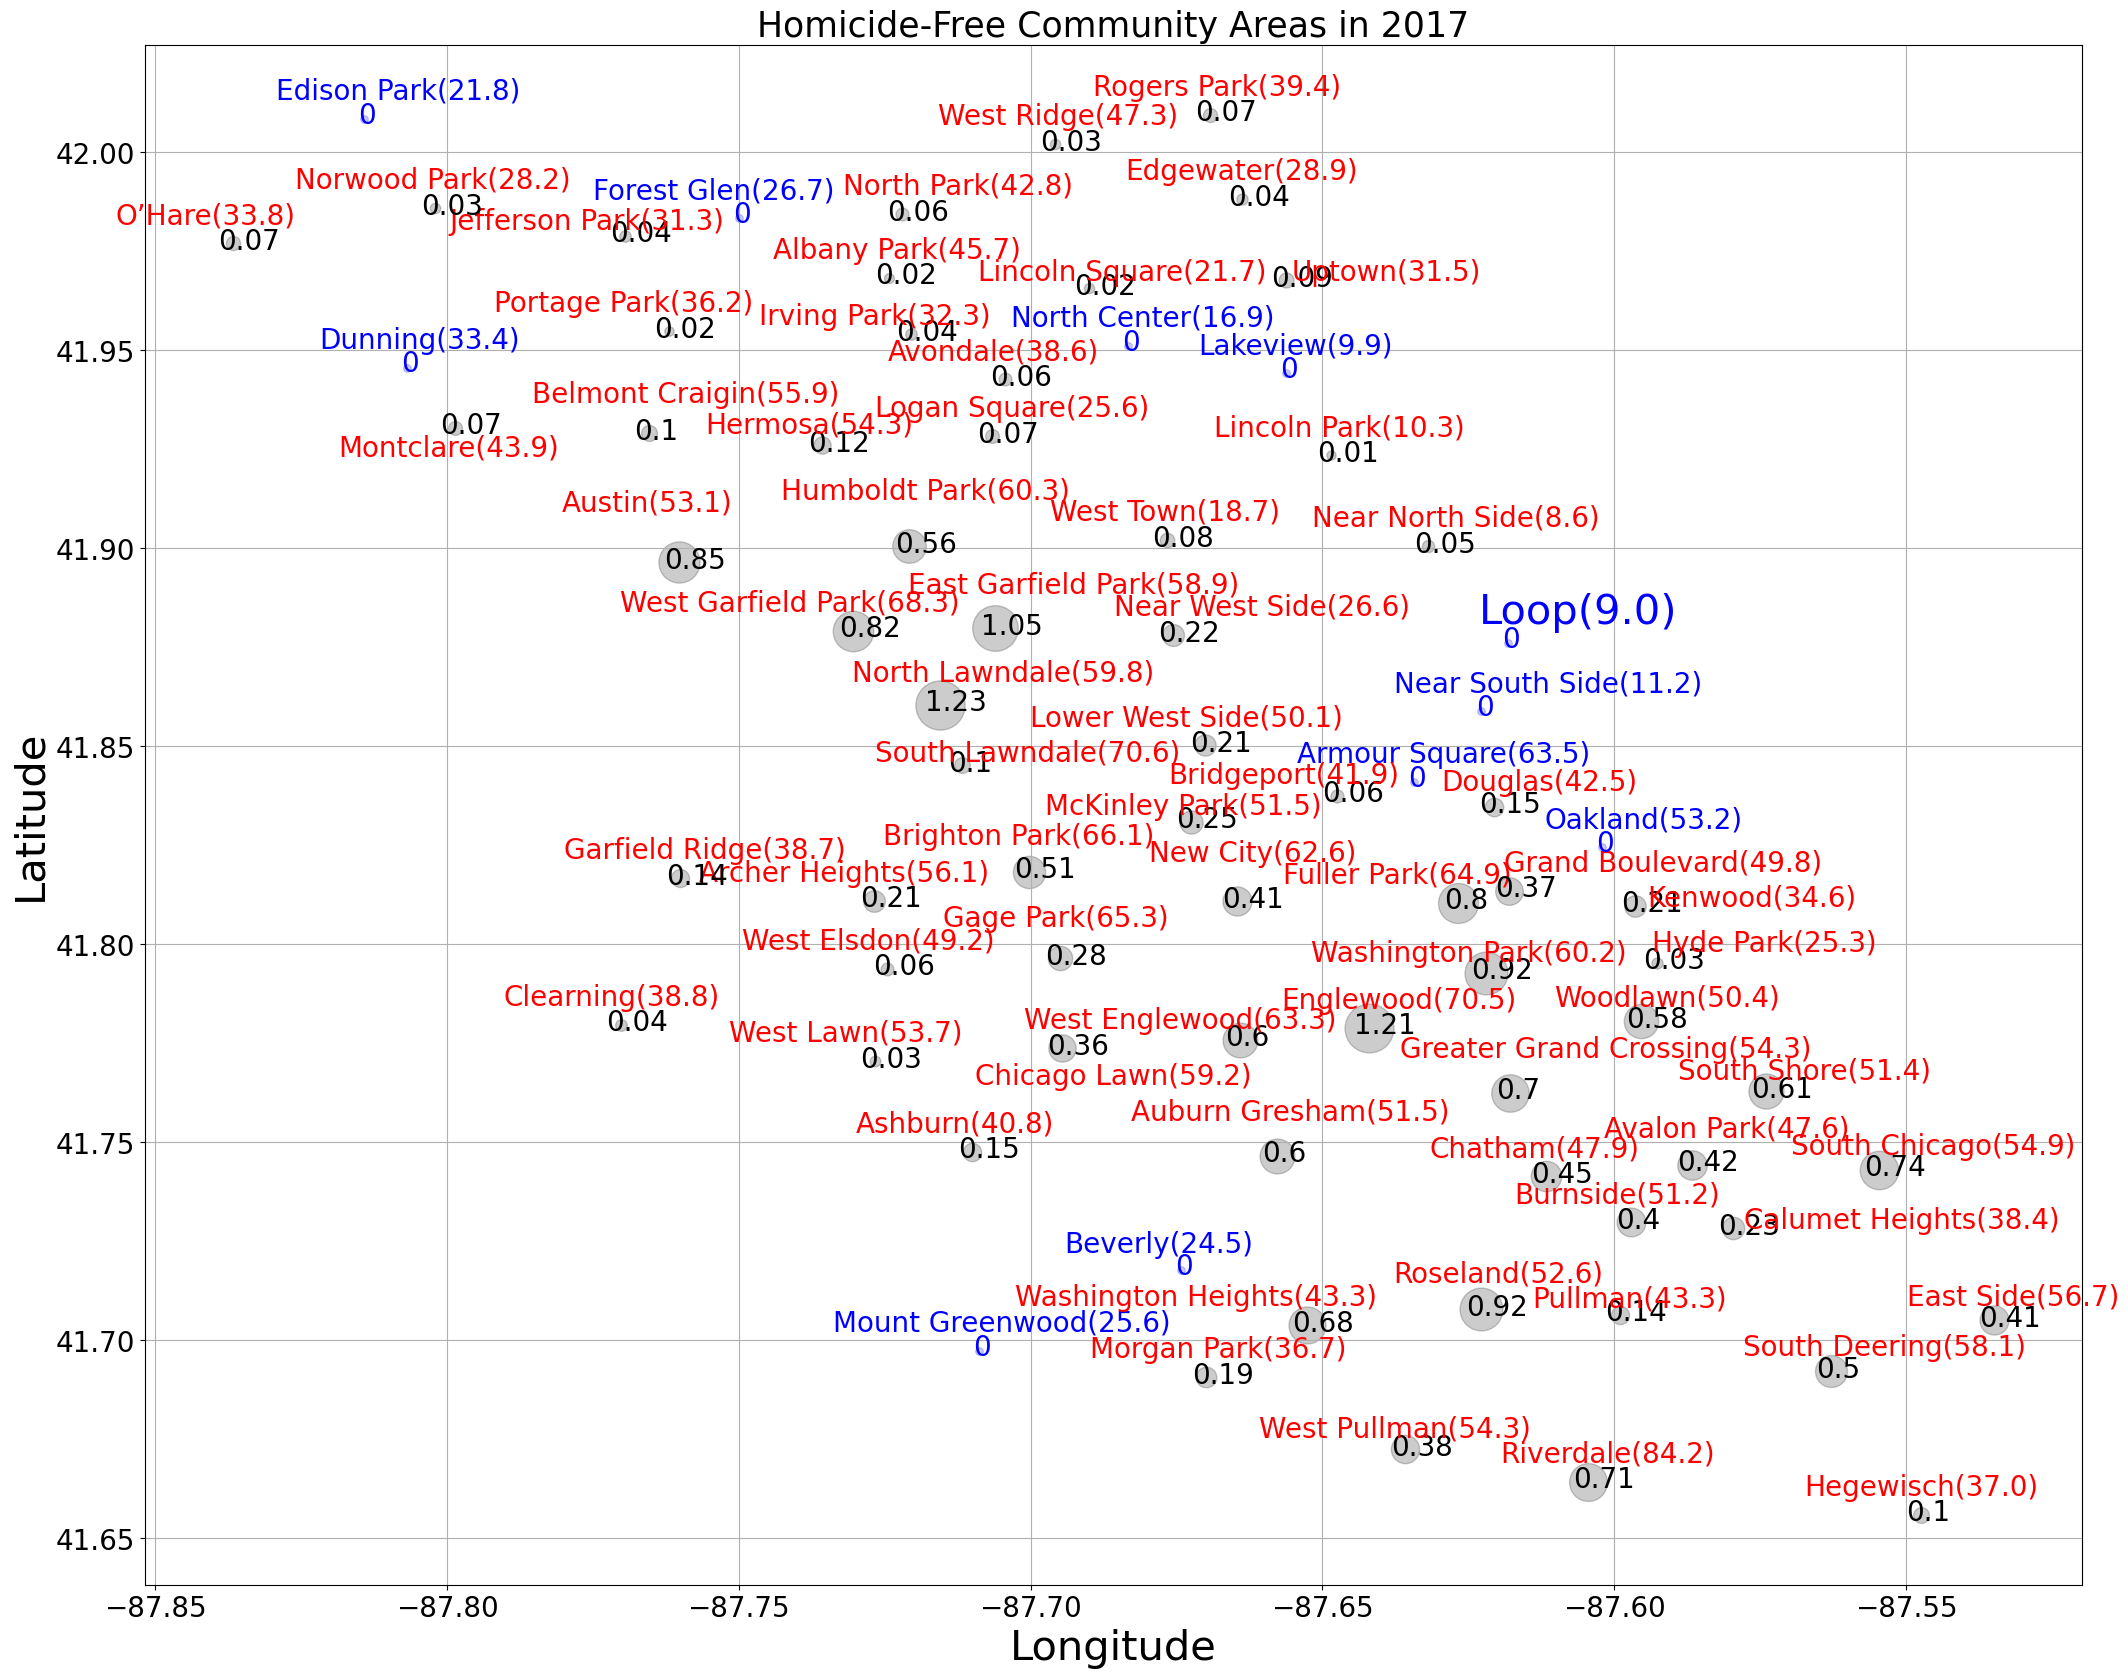

In [6]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,20))

for i in hom_df.index:
    
    if hom_df.loc[i,"HOM17"]==0:   
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=30,color='b', alpha=0.2)
        plt.gca().text(hom_df.loc[i,'LON']-.001, hom_df.loc[i,'LAT']-.001,hom_df.loc[i,'HOM17'],color='b', alpha=1,size=20)
        if hom_df.loc[i,"Community"] in ["Loop"]:
            plt.gca().text(hom_df.loc[i,'LON']-.005, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=30)
        elif hom_df.loc[i,"Community"] in ["Hyde Park","Near West Side","Kenwood","Near North Side","West Town"]:
            plt.gca().text(hom_df.loc[i,'LON']+.003, hom_df.loc[i,'LAT']-.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Lincoln Park","Uptown","Edgewater","Rogers Park","Logan Square","Avondale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Lincoln Square","Irving Park","Portage Park","Jefferson Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Dunning","O’Hare","Edison Park","Norwood Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
               
        elif hom_df.loc[i,"Community"] in ["Garfield Ridge","Clearning","Ashburn","Morgan Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.0015, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Hegewisch"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Forest Glen"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["North Center"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Oakland"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Mount Greenwood"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Lakeview"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Near South Side"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
      
        elif hom_df.loc[i,"Community"] in ["Edison Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='green', size=20)
        elif hom_df.loc[i,"Community"] in ["Beverly"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02, hom_df.loc[i,'LAT']+.0045, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        
        
        else:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        
    else:
        p=hom_df.loc[i,'population(K)']
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=30+1000*hom_df.loc[i,'HOM17']/p,color='k', alpha=0.2)
        plt.gca().text(hom_df.loc[i,'LON']-.0025, hom_df.loc[i,'LAT']-.0015,str(round(hom_df.loc[i,'HOM17']/p,2)),color='k', alpha=1,size=20)
        if hom_df.loc[i,"Community"] in ["Austin"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.013, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Belmont Craigin"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.0078, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Chicago Lawn"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']-.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Pullman"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Roseland"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.007,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Garfield Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.04,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Oakland","Armour Square"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Bridgeport"]:
            plt.gca().text(hom_df.loc[i,'LON']-.029,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["South Shore"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Pullman"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Washington Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
       
        elif hom_df.loc[i,"Community"] in ["Washington Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']-.05,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Ridge","Albany Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["North Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Lincoln Square"]:
            plt.gca().text(hom_df.loc[i,'LON']-.019,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Hermosa"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Montclare"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']-.007, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Town"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Near West Side"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Lower West Side"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["North Lawndale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.006,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Douglas"]:
            plt.gca().text(hom_df.loc[i,'LON']-.009,hom_df.loc[i,'LAT']+.004,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Archer Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["New City"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.01, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["South Chicago"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.004, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Lawn"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Kenwood"]:
            plt.gca().text(hom_df.loc[i,'LON']+.002,hom_df.loc[i,'LAT'], hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Grand Boulevard"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Fuller Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Hyde Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Calumet Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']+.002,hom_df.loc[i,'LAT'],hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Jefferson Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.0015,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Uptown"]:
            plt.gca().text(hom_df.loc[i,'LON']+.001,hom_df.loc[i,'LAT'],hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Englewood"]:
            plt.gca().text(hom_df.loc[i,'LON']-.037,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Portage Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Irving Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.026, hom_df.loc[i,'LAT']+.0025, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Humboldt Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.022,hom_df.loc[i,'LAT']+.012,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Brighton Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.007, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["South Lawndale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.001, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["McKinley Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.002, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Elsdon"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Gage Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.008, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Woodlawn"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.004, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Englewood"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Greater Grand Crossing"]:
            plt.gca().text(hom_df.loc[i,'LON']-.019,hom_df.loc[i,'LAT']+.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Auburn Gresham"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Avalon Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.007,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Burnside"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["East Side","South Deering"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.004, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Riverdale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Norwood Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.024,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["East Garfield Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.009,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
       
        else:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        
#plt.gca().set_facecolor('lightgray')
plt.gca().grid()
plt.yticks(fontsize=20) 
plt.xticks(fontsize=20)
#title
plt.title('Homicide-Free Community Areas in 2017',size=25)
plt.xlabel("Longitude",size=30)
plt.ylabel("Latitude",size=30)
fig.savefig("Fig5revised.png") 
#show the plot
plt.show()

## Arts in STEM(STEAM)

**Pixel Images**

1a) By increasing the number of pixels, we can get a better reproduction of the original.
Create a 16x16 pixel image.  

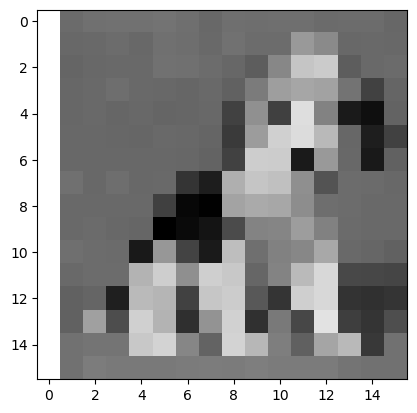

In [6]:
makepixelimage("images", 16)

1b) Create a 32x32 pixel image.

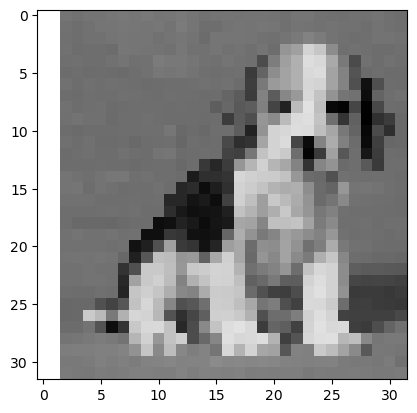

In [8]:
makepixelimage("images", 32)

2) Upload a different image into a folder called "my_images". Then use the makepixelimage( , ) function  to create an 8x8, 16x16 and 32x32 pixel image and see if the others in the class can guess your original image

**Many answers possible.**

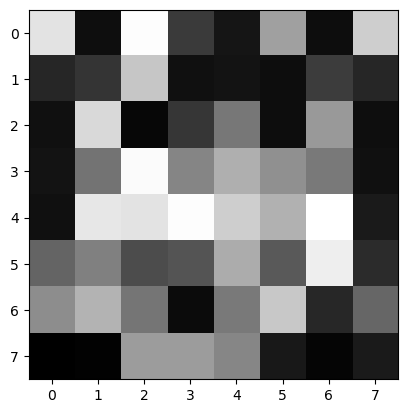

In [9]:
makepixelimage("my_images", 8)

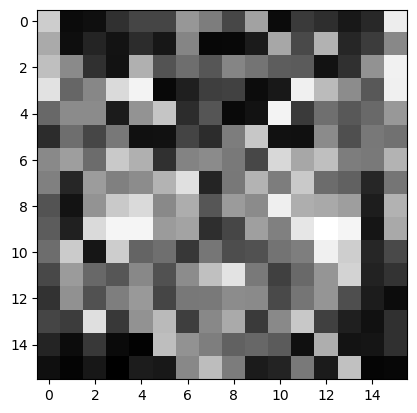

In [10]:
makepixelimage("my_images", 16)

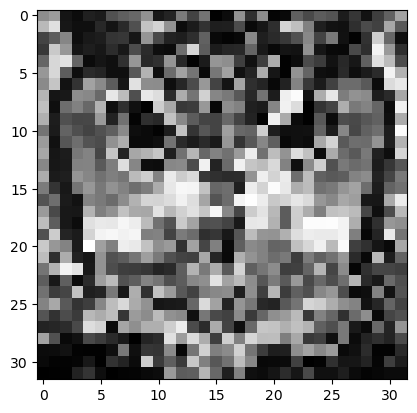

In [11]:
makepixelimage("my_images", 32)

**WORD CLOUDS** 
**Many Possible Answers**

In [19]:
with open('john.txt','r') as file:  #read in the text file
    gospeljohn = file.readlines()

Word Cloud of Gospel of John with 30 words

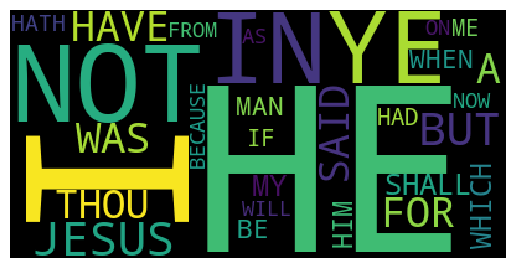

In [23]:
myimagejohn = calculate_frequencies(gospeljohn)
plt.imshow(myimagejohn, interpolation = 'nearest')
plt.axis('off')
plt.savefig('john.png', bbox_inches='tight')
plt.show()

**Name that Tune!**
**many possible answers**

In [41]:
saintsaens = [so, so , so, so, la, la,la,la,so, so , do1, do1, so, so,fa,fa,mi,mi,fa,so,la,la,fa,fa,re,re,re,re,so,so,so,so]
play(saintsaens)

**Random Numbers and Pi**

Percentage of Blue Points= 78.24
Estimate of Pi= 3.1296


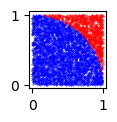

In [52]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1232023) 
def dist(x,y):
    d=np.sqrt(x**2+y**2)
    return d
fig=plt.figure(figsize=(1,1))
N=5000
blue=0
red=0
for n in np.arange(0,N,1):
    x=np.random.rand(1)
    y=np.random.rand(1)
    if dist(x,y)<=1:
        plt.scatter(x, y,s=.1,  marker='o', color='blue')
        blue=blue+1
    else:
        plt.scatter(x, y,s=.1,  marker='o', color='red')
        red=red+1
print("Percentage of Blue Points=", (blue/N)*100)
print("Estimate of Pi=", 4* (blue/N))

### Simulating Formula 1

In [59]:
# frame 0
c1=car(.43,.15,'car1.png',.14,0)
c2=car(.2,.15,'car2.png',.12,0)
simulate(c1,c2,0)
#frame 1
c1.speed=.8
c1.go(.2,0)
c2.speed=.8
c2.go(.2,0)
simulate(c1,c2,1)
#frame 2
c1.speed=.9
c1.size=c1.size*.9
c1.go(.2,.15)
c1.image="car1left.png"
c2.speed=.9
c2.size=c2.size*.9
c2.go(.35,.15)
c2.image="car2left.png"
simulate(c1,c2,2)
frames=3
from PIL import Image
images = []
for n in range(frames):
    exec('a'+str(n)+'=Image.open("'+str(n)+'.png")')
    images.append(eval('a'+str(n)))
images[0].save('F1a.gif',
               save_all=True,
               append_images=images[1:],
               duration=300,
               loop=0)

<img src="F1a.gif" width="750" align="center">